<a href="https://colab.research.google.com/github/yukinaga/image_classification/blob/main/section_2/01_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データ拡張
データ拡張では、汎化性能の向上のために画像の「水増し」を行います。  
今回は、`torchvision.transforms`を使い、回転、拡大/縮小などによるデータ拡張のデモを行います。   
  
`torchvision.transforms`は様々なデータの変形を用意しています。  
興味のある方は、公式ドキュメントを読んでみましょう。  
https://pytorch.org/vision/stable/transforms.html

## CIFAR-10
今回のデモには、CIFAR-10というデータセットを使います。  
CIFARは、以下の特徴を持ちます。  

* 約6万枚のラベル付き画像
* RGBカラー
* ラベルはairplaneやautomobileなどの乗り物と、birdやcatなどの動物
* 画像サイズは32×32
  
以下のコードは、`torchvision.datasets`を使ってCIFAR-10を読み込み、ランダムな36枚の画像を表示します。

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
データの数: 10000


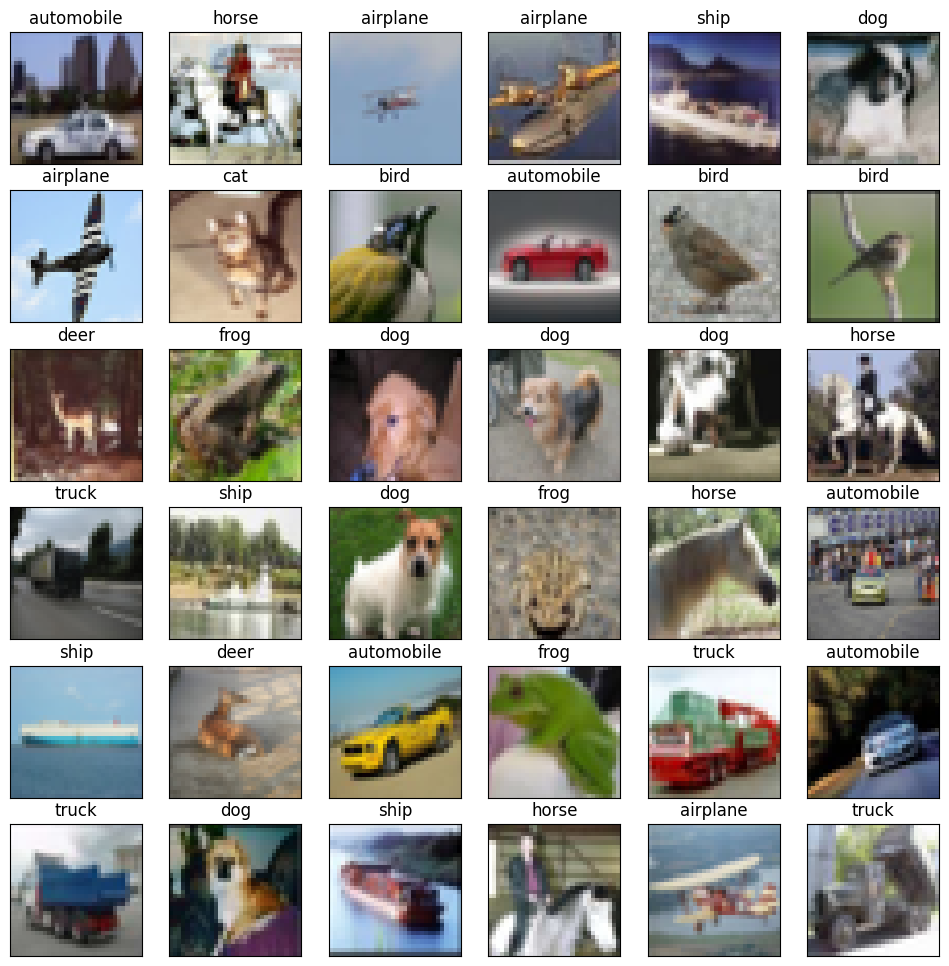

In [1]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

cifar10_data = CIFAR10(root="./data",
                       train=False,download=True,
                       transform=transforms.ToTensor())
cifar10_classes = ["airplane", "automobile", "bird",
                   "cat", "deer", "dog", "frog",
                   "horse", "ship", "truck"]
print("データの数:", len(cifar10_data))

n_image = 36  # 表示する画像の数
cifar10_loader = DataLoader(cifar10_data, batch_size=n_image, shuffle=True)
dataiter = iter(cifar10_loader)  # イテレータ: 要素を順番に取り出す
images, labels = next(dataiter)  # 最初のバッチ

plt.figure(figsize=(12,12))  # 画像の表示サイズ
for i in range(n_image):
    ax = plt.subplot(6, 6 ,i+1)
    ax.imshow(images[i].permute(1, 2, 0))  # 一番後の次元をチャンネルに
    label = cifar10_classes[labels[i]]
    ax.set_title(label)
    ax.get_xaxis().set_visible(False)  # 軸を非表示に
    ax.get_yaxis().set_visible(False)

plt.show()

## 回転とリサイズ
`transforms.RandomAffine()`を使って、画像に-45〜45°の範囲の回転、および0.5〜1.5倍の範囲のリサイズを加えます。    

Files already downloaded and verified


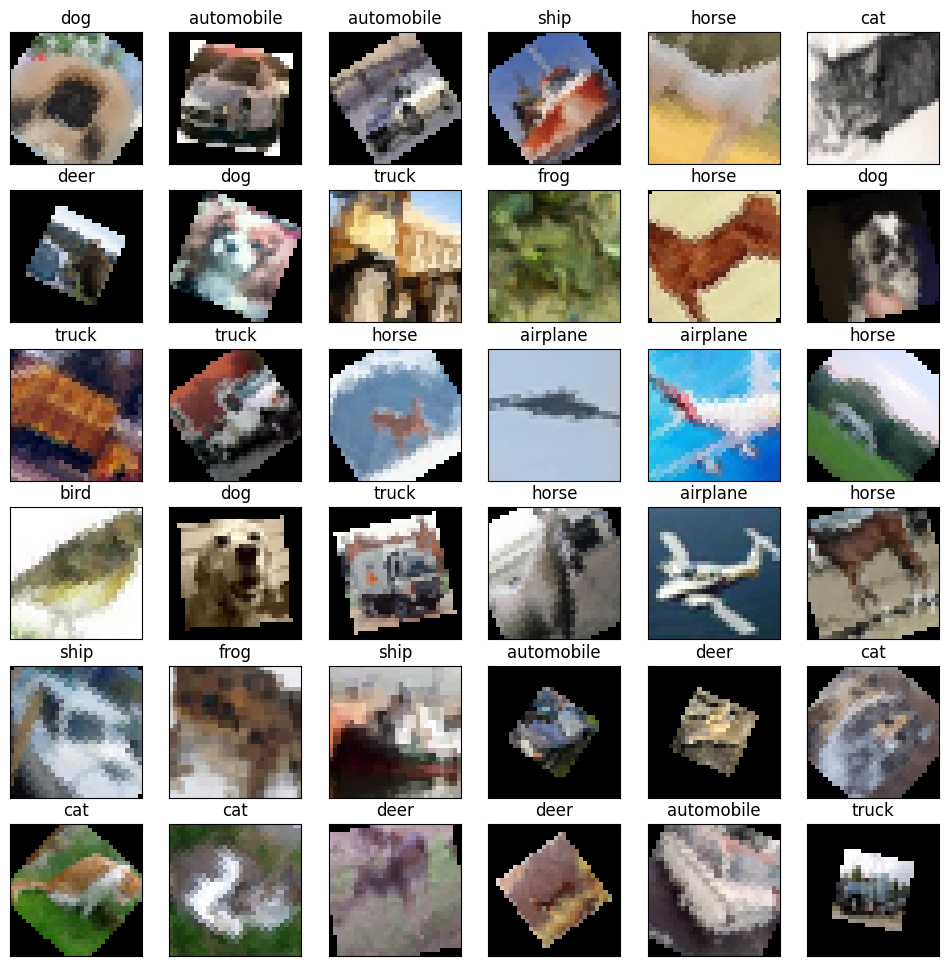

In [2]:
transform = transforms.Compose([transforms.RandomAffine((-45, 45), scale=(0.5, 1.5)),  # 回転とリサイズ
                                transforms.ToTensor()])
cifar10_data = CIFAR10(root="./data",
                       train=False,download=True,
                       transform=transform)

cifar10_loader = DataLoader(cifar10_data, batch_size=n_image, shuffle=True)
dataiter = iter(cifar10_loader)
images, labels = next(dataiter)

plt.figure(figsize=(12,12))  # 画像の表示サイズ
for i in range(n_image):
    ax = plt.subplot(6, 6, i+1)
    ax.imshow(images[i].permute(1, 2, 0))
    label = cifar10_classes[labels[i]]
    ax.set_title(label)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## シフト
`transforms.RandomAffine()`を使って、画像サイズの0.5倍以内のシフトを、水平方向、垂直方向それぞれに加えます。   

Files already downloaded and verified


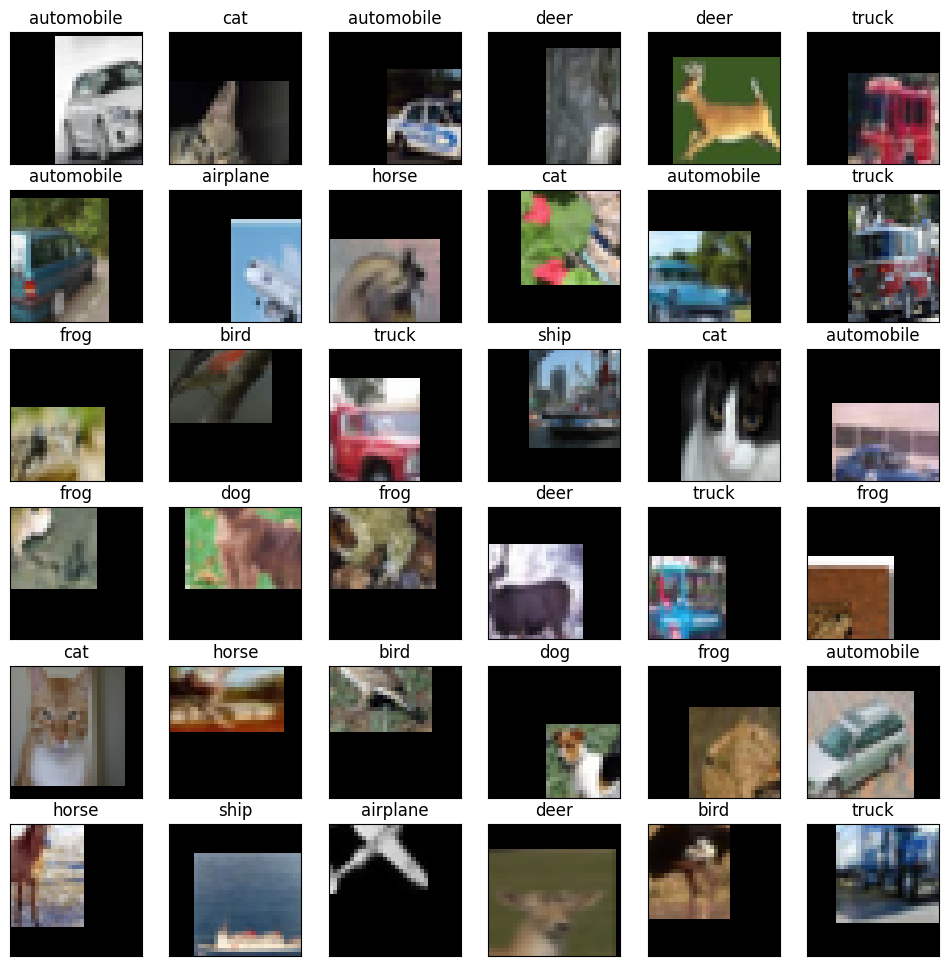

In [3]:
transform = transforms.Compose([transforms.RandomAffine((0, 0), translate=(0.5, 0.5)),  # 上下左右へのシフト
                                transforms.ToTensor()])
cifar10_data = CIFAR10(root="./data",
                       train=False,download=True,
                       transform=transform)

cifar10_loader = DataLoader(cifar10_data, batch_size=n_image, shuffle=True)
dataiter = iter(cifar10_loader)
images, labels = next(dataiter)

plt.figure(figsize=(12,12))  # 画像の表示サイズ
for i in range(n_image):
    ax = plt.subplot(6, 6, i+1)
    ax.imshow(images[i].permute(1, 2, 0))
    label = cifar10_classes[labels[i]]
    ax.set_title(label)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## 反転
`transforms.RandomHorizontalFlip()`と`transforms.RandomVerticalFlip()`を使って、画像に、水平方向、垂直方向それぞれ0.5の確率（`p=0.5`）で反転をランダムに加えます。  

Files already downloaded and verified


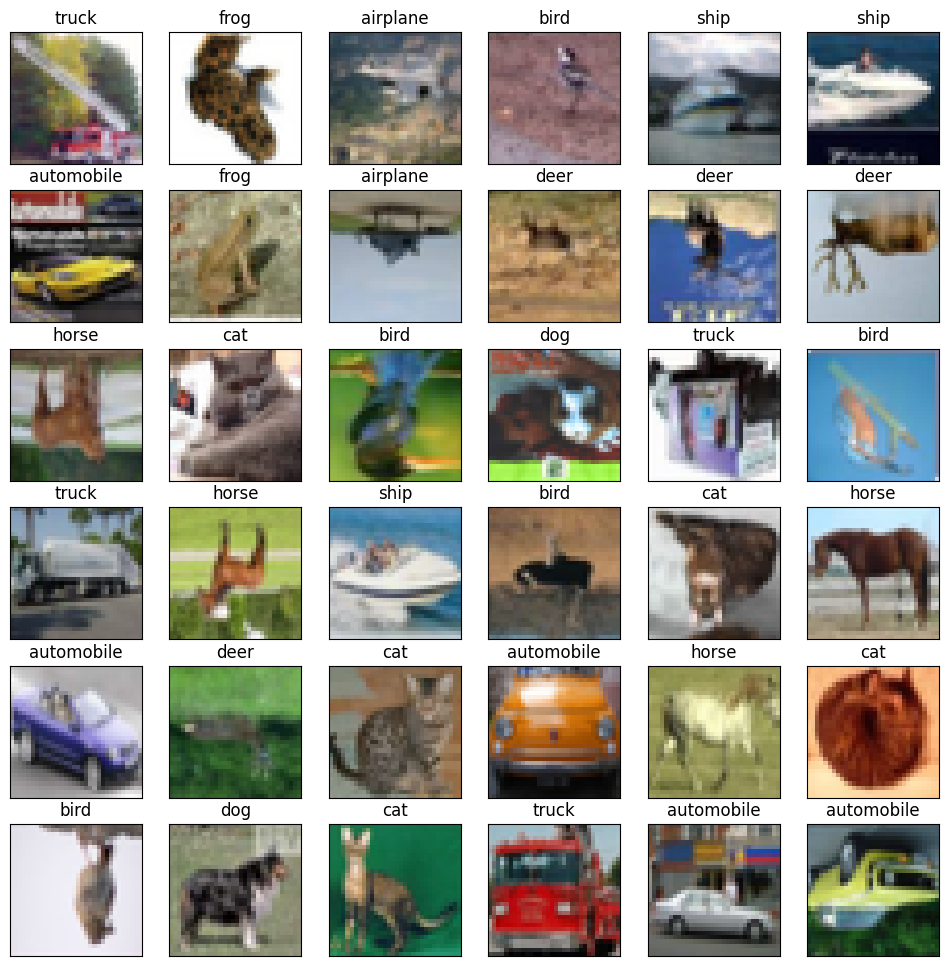

In [6]:
transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),  # 左右反転
                                transforms.RandomVerticalFlip(p=0.5),  # 上下反転
                                transforms.ToTensor()])
cifar10_data = CIFAR10(root="./data",
                       train=False,download=True,
                       transform=transform)

cifar10_loader = DataLoader(cifar10_data, batch_size=n_image, shuffle=True)
dataiter = iter(cifar10_loader)
images, labels = next(dataiter)

plt.figure(figsize=(12,12))  # 画像の表示サイズ
for i in range(n_image):
    ax = plt.subplot(6, 6, i+1)
    ax.imshow(images[i].permute(1, 2, 0))
    label = cifar10_classes[labels[i]]
    ax.set_title(label)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## 一部を消去
`transforms.RandomErasing()`を使って、画像の一部を0.5の確率（`p=0.5`）で消去します。  

Files already downloaded and verified


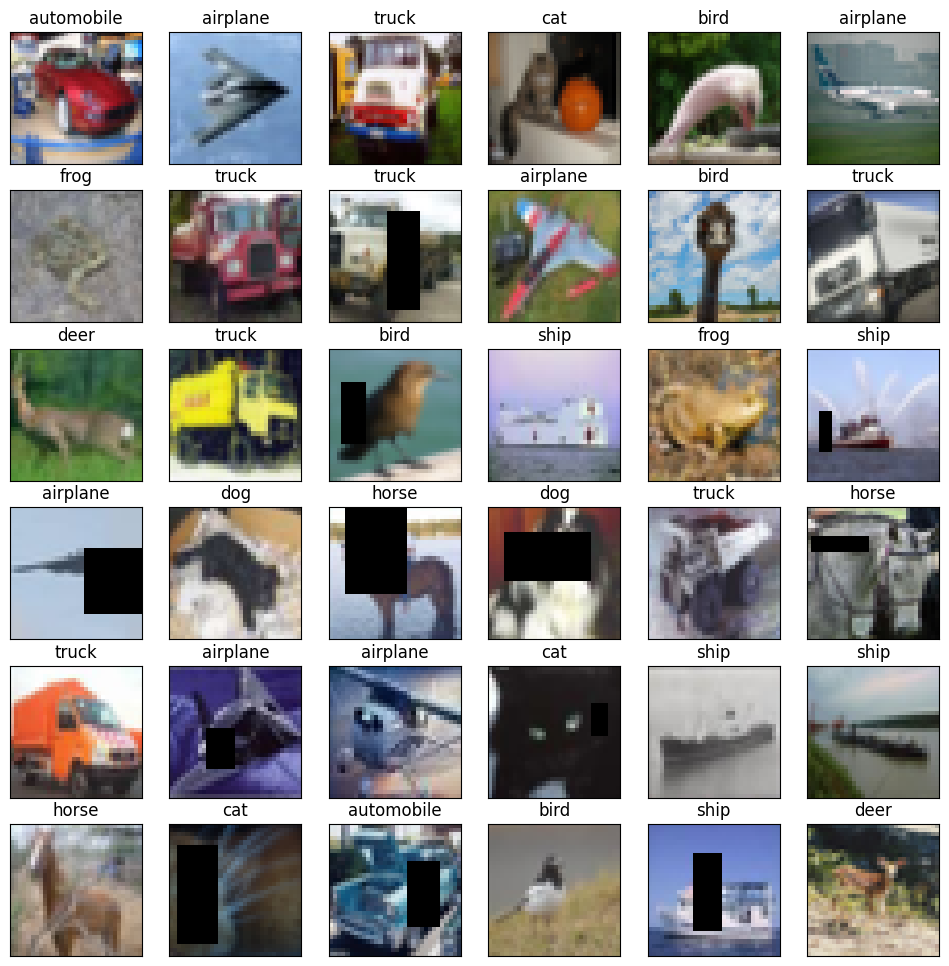

In [5]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.RandomErasing(p=0.5)])  # 一部を消去, randomErasingはtensorデータにしか適用できない
cifar10_data = CIFAR10(root="./data",
                       train=False,download=True,
                       transform=transform)

cifar10_loader = DataLoader(cifar10_data, batch_size=n_image, shuffle=True)
dataiter = iter(cifar10_loader)
images, labels = next(dataiter)

plt.figure(figsize=(12,12))  # 画像の表示サイズ
for i in range(n_image):
    ax = plt.subplot(6, 6, i+1)
    ax.imshow(images[i].permute(1, 2, 0))
    label = cifar10_classes[labels[i]]
    ax.set_title(label)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

`transforms.RandomErasing()`はTensorにしか適用できないので、`transforms.ToTensor()`以降に記述します。  